# Bibliotecas

In [1]:
from madeiras import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from UQpy.distributions import Normal
from UQpy.reliability import FORM
from UQpy.run_model.RunModel import RunModel
from UQpy.run_model.model_execution.PythonModel import PythonModel

c:\Users\user\Documents\wanderpy\reliabridge\myenv\Lib\site-packages\UQpy\__init__.py:6: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


# Execução da otimização

In [2]:
df = pd.read_excel("beam_data.xlsx")
df = df.to_dict(orient="records")
df = df[0] 
df

{'l (cm)': 600,
 'b_wpista (cm)': 900,
 'tipo_secao_longarina': 'Circular',
 'tipo_secao_tabuleiro': 'Retangular',
 'p_gk (kN/m²)': 1,
 'p_rodak (kN)': 40,
 'p_qk (kN/m²)': 4,
 'a (m)': 1.5,
 'classe_carregamento': 'permanente',
 'classe_madeira': 'madeira natural',
 'classe_umidade': 1,
 'gamma_g': 1.4,
 'gamma_q': 1.3,
 'gamma_w': 1.4,
 'psi_2': 0.3,
 'phi': 0.8,
 'densidade longarina (kg/m³)': 350,
 'resistência característica à flexão longarina (MPa)': 50,
 'resistência característica ao cisalhamento longarina (MPa)': 20,
 'módulo de elasticidade à flexão longarina (GPa)': 12,
 'densidade tabuleiro (kg/m³)': 350,
 'resistência característica à flexão tabuleiro (MPa)': 40}

In [3]:
ds = [30, 150]
esps = [30, 200]
bws = [12, 60]
hs = [12, 60]
res_nsga = chamando_nsga2(df, ds, esps, bws, hs)
res_nsga

,d [cm],esp [cm],bw [cm],h [cm],area [m²],delta [m],flex lim beam [kPa],cis lim beam [kPa],delta lim beam [m],flex lim deck [kPa]
0,30.511080,199.623635,12.0,56.333592,0.140715,0.023029,-0.063412,-4806.981949,-0.000971,-13105.774298
1,30.000000,47.615104,12.0,12.000000,0.085086,0.004937,-12125.906676,-6745.447187,-0.008183,-15629.222455
2,30.243386,199.842452,12.0,52.732098,0.135116,0.023003,-3.431323,-4825.375117,-0.000997,-12530.804337
3,30.000000,66.115732,12.0,12.000000,0.085086,0.006020,-11398.314847,-6631.157330,-0.008183,-5064.449534
4,30.000000,47.615104,12.0,12.000000,0.085086,0.004937,-12125.906676,-6745.447187,-0.008183,-15629.222455
...,...,...,...,...,...,...,...,...,...,...
495,30.000000,199.999079,12.0,33.191397,0.110516,0.019002,-2674.347238,-5260.799702,-0.004998,-5515.519369
496,30.000000,196.980605,12.0,27.100809,0.103207,0.017291,-3824.287812,-5441.431945,-0.006709,-54.568197
497,30.000000,156.711323,12.0,23.215655,0.098545,0.013456,-6401.078960,-5846.193352,-0.008183,-47.826776
498,30.000000,185.263074,12.0,26.037138,0.101930,0.016151,-4590.317633,-5561.759628,-0.007849,-63.584906


# Fronteira eficiente

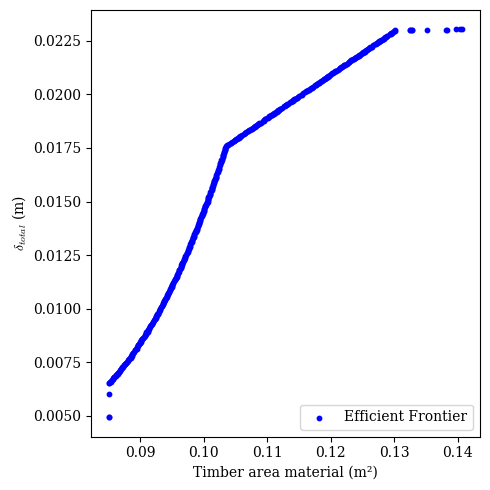

In [4]:
plt.rc('font', family='serif')
plt.figure(figsize=(5, 5))
plt.scatter(res_nsga["area [m²]"].to_list(), res_nsga["delta [m]"].to_list(), label="Efficient Frontier", color='blue', s=10)
plt.xlabel(r"Timber area material (m²)")
plt.ylabel(r"$\delta_{total}$ (m)")
plt.legend(loc='lower right',)
plt.tight_layout()
plt.show()

# Teste da função objetivo

In [5]:
# 1) Instancia o problema
problem = ProjetoOtimo(
                        l=df["l (cm)"],
                        p_gk=df["p_gk (kN/m²)"],
                        p_rodak=df["p_rodak (kN)"],
                        p_qk=df["p_qk (kN/m²)"],
                        a=df["a (m)"],
                        classe_carregamento=df["classe_carregamento"],
                        classe_madeira=df["classe_madeira"],
                        classe_umidade=df["classe_umidade"],
                        gamma_g=df["gamma_g"],
                        gamma_q=df["gamma_q"],
                        gamma_w=df["gamma_w"],
                        psi2=df["psi_2"],
                        phi=df["phi"],
                        densidade_long=df["densidade longarina (kg/m³)"],
                        densidade_tab=df["densidade tabuleiro (kg/m³)"],
                        f_mk_long=df["resistência característica à flexão longarina (MPa)"],
                        f_vk_long=df["resistência característica ao cisalhamento longarina (MPa)"],
                        e_modflex_long=df["módulo de elasticidade à flexão longarina (GPa)"],
                        f_mk_tab=df["resistência característica à flexão tabuleiro (MPa)"],
                        d_min=ds[0],
                        d_max=ds[1],
                        esp_min=esps[0],
                        esp_max=esps[1],
                        bw_min=bws[0],
                        bw_max=bws[1],
                        h_min=hs[0],
                        h_max=hs[1],
                    )

# 2) Define uma solução manual
x_manual = np.array([[90.0, 50.0, 20., 40.]])   # d, esp, bw, h

# 3) Avalia
out = problem.evaluate(x_manual, return_values_of=["F", "G"])

# 4) Imprime resultados
f = out[0]
g = out[1]
print(f, g)

[[ 7.16172512e-01 -1.26051115e-04]] [[-2.09527850e+04 -8.38450224e+03 -1.70322419e-02 -1.69850961e+04]]


# Monte Carlo

Total amostras: 25000
Viáveis: 24266


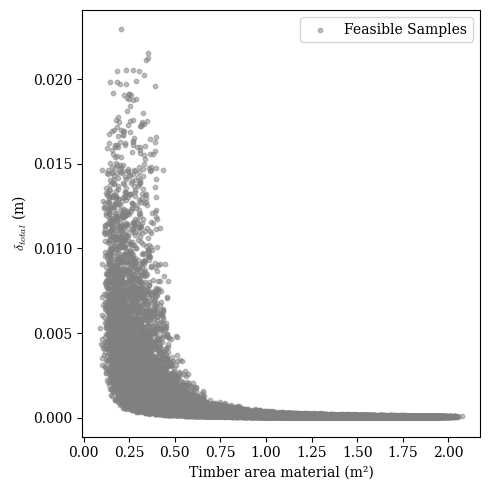

In [6]:
# ---------------------------
# Monte Carlo + filtro viável
# ---------------------------
N = 25000
rng = np.random.default_rng(123)

# amostra uniformemente no intervalo do problema
d_mc = rng.uniform(problem.xl[0], problem.xu[0], size=N)
X_mc = d_mc.reshape(-1, 1)   # shape (N,1)
esp_mc = rng.uniform(problem.xl[1], problem.xu[1], size=N)
bw_mc = rng.uniform(problem.xl[2], problem.xu[2], size=N)
h_mc = rng.uniform(problem.xl[3], problem.xu[3], size=N)
X_mc = np.column_stack((d_mc, esp_mc, bw_mc,  h_mc))  # shape (N,4)

# avalia em lote
out = problem.evaluate(X_mc, return_values_of=["F", "G"])
F = np.asarray(out[0])   # shape (N,2)
G = np.asarray(out[1])   # shape (N,4)

# filtro de viabilidade: todas restrições <= 0
mask_feas = np.all(G <= 0.0, axis=1)

F_feas = F[mask_feas]
G_feas = G[mask_feas]
X_feas = X_mc[mask_feas]

print("Total amostras:", N)
print("Viáveis:", int(mask_feas.sum()))

# ---------------------------
# Scatter plot (f1 vs f2)
# ---------------------------
# Se seu f2 = -delta, converta para delta positivo no plot:
F_plot = F_feas.copy()
F_plot[:, 1] = -F_plot[:, 1]

plt.rc('font', family='serif')
plt.figure(figsize=(5, 5))
plt.scatter(F_plot[:, 0], F_plot[:, 1], s=10, color='gray', alpha=0.5, label="Feasible Samples")
plt.xlabel(r"Timber area material (m²)")
plt.ylabel(r"$\delta_{total}$ (m)")
plt.legend(loc='upper right',)
plt.tight_layout()
plt.show()

# Unindo as duas soluções

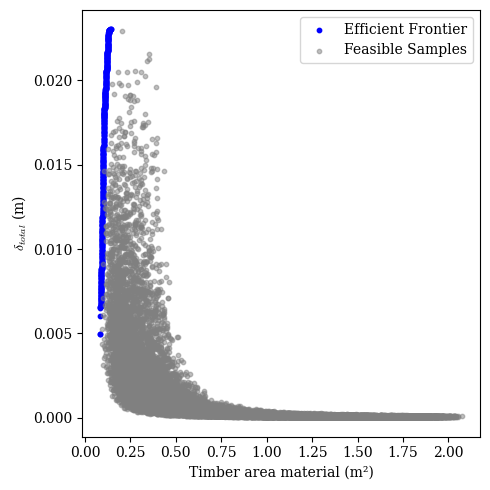

In [7]:
plt.rc('font', family='serif')
plt.figure(figsize=(5, 5))
plt.scatter(res_nsga["area [m²]"].to_list(), res_nsga["delta [m]"].to_list(), label="Efficient Frontier", color='blue', s=10)
plt.scatter(F_plot[:, 0], F_plot[:, 1], s=10, color='gray', alpha=0.5, label="Feasible Samples")
plt.xlabel(r"Timber area material (m²)")
plt.ylabel(r"$\delta_{total}$ (m)")
plt.legend(loc='upper right',)
plt.tight_layout()
plt.show()

# Confiabilidade

In [18]:
df = pd.read_excel("beam_data.xlsx")
df = df.loc[0]
p_gk = float(df["p_gk (kN/m²)"])
p_rodak = float(df["p_rodak (kN)"])
p_qk = float(df["p_qk (kN/m²)"])
a = float(df["a (m)"])
l = float(df["l (cm)"])
classe_carregamento = df["classe_carregamento"]
classe_madeira = df["classe_madeira"]
classe_umidade = df["classe_umidade"]
f_mk = float(df["resistência característica à flexão longarina (MPa)"])
f_vk = float(df["resistência característica ao cisalhamento longarina (MPa)"])
e_modflex = float(df["módulo de elasticidade à flexão longarina (GPa)"])
f_mktab = float(df["resistência característica à flexão tabuleiro (MPa)"])
densidade_long = float(df["densidade longarina (kg/m³)"])
densidade_tab = float(df["densidade tabuleiro (kg/m³)"])
d = 31.
esp = 120.0
bw = 11.0
h = 30.0

In [19]:
samples = np.array([[p_gk, p_rodak, p_qk, f_mk, f_vk, e_modflex, f_mktab, densidade_long, densidade_tab]])
params = [a, l, classe_carregamento, classe_madeira, classe_umidade, d, esp, bw, h, "flexao"]
obj_confia(samples, params)

array([20593.41270671])

In [20]:
beta, pf = chamando_form(p_gk, p_rodak, p_qk, a, l, classe_carregamento, classe_madeira, classe_umidade, f_mk, f_vk, e_modflex, f_mktab, densidade_long, densidade_tab, d, esp, bw, h, "flexao")
beta, pf

(5.771873670230063, 3.9197441398617676e-09)

In [21]:
sm, beta, pf = chamando_sampling(p_gk, p_rodak, p_qk, a, l, classe_carregamento, classe_madeira, classe_umidade, f_mk, f_vk, e_modflex, f_mktab, densidade_long, densidade_tab, d, esp, bw, h, "flexao")
beta, pf

(8.222082216130435, 0.0)

In [29]:
df = pd.DataFrame(sm.samples)
df


,0,1,2,3,4,5,6,7,8
0,1.122823,30.072166,3.634224,51.968033,23.588432,10.107420,37.045918,374.610853,401.719636
1,0.971830,65.838885,2.947671,52.204534,15.488847,12.239419,44.216807,378.961914,359.728248
2,1.040472,35.885998,3.344755,46.442239,23.259061,11.597341,35.066063,378.279403,304.616357
3,0.946961,45.016386,4.884193,44.078374,20.299566,11.391606,39.471140,329.364093,323.541497
4,0.964728,49.716151,4.109332,53.057577,18.804924,12.807162,41.030553,337.308653,355.406866
...,...,...,...,...,...,...,...,...,...
99995,0.968849,49.154493,5.536739,54.684411,20.385322,15.040824,38.838233,377.987446,370.950118
99996,1.021868,44.069242,3.891072,45.981546,19.623182,14.315116,41.440812,343.820865,411.109493
99997,0.870630,34.910458,4.108890,49.028001,21.318938,11.817342,50.779032,429.800719,347.551939
99998,1.092064,31.154944,5.117792,51.800389,19.493861,11.427719,33.306513,403.283032,349.289624


In [30]:
model = PythonModel(model_script='madeiras.py', model_object_name='obj_confia', params=params)
rmodel = RunModel(model=model)
rmodel.run(samples=sm.samples)
rmodel.qoi_list

[array([0.02038053]),
 array([0.02455483]),
 array([0.02338306]),
 array([0.02013962]),
 array([0.02293448]),
 array([0.02254129]),
 array([0.02201603]),
 array([0.01706905]),
 array([0.02239982]),
 array([0.0241012]),
 array([0.02412375]),
 array([0.02190754]),
 array([0.02426632]),
 array([0.02120857]),
 array([0.02122592]),
 array([0.02493292]),
 array([0.01678574]),
 array([0.02241906]),
 array([0.02259383]),
 array([0.02182287]),
 array([0.02320409]),
 array([0.02220793]),
 array([0.02354803]),
 array([0.02101893]),
 array([0.02342792]),
 array([0.02171596]),
 array([0.02234953]),
 array([0.01019827]),
 array([0.02389187]),
 array([0.02299315]),
 array([0.020995]),
 array([0.01585588]),
 array([0.02375947]),
 array([0.02358554]),
 array([0.02262089]),
 array([0.01876584]),
 array([0.0237258]),
 array([0.02349608]),
 array([0.01960475]),
 array([0.01907038]),
 array([0.02159614]),
 array([0.02440405]),
 array([0.02019724]),
 array([0.02068783]),
 array([0.02245633]),
 array([0.0215

In [23]:
samples = np.array([[p_gk, p_rodak, p_qk, f_mk, f_vk, e_modflex, f_mktab, densidade_long, densidade_tab]])
params = [a, l, classe_carregamento, classe_madeira, classe_umidade, d, esp, bw, h, "flecha"]
obj_confia(samples, params)

array([0.02233251])

In [24]:
beta, pf = chamando_form(p_gk, p_rodak, p_qk, a, l, classe_carregamento, classe_madeira, classe_umidade, f_mk, f_vk, e_modflex, f_mktab, densidade_long, densidade_tab, d, esp, bw, h, "flecha")
beta, pf

(nan, nan)

In [25]:
sf, beta, pf = chamando_sampling(p_gk, p_rodak, p_qk, a, l, classe_carregamento, classe_madeira, classe_umidade, f_mk, f_vk, e_modflex, f_mktab, densidade_long, densidade_tab, d, esp, bw, h, "flecha")
beta, pf

(8.222082216130435, 0.0)

In [26]:
sf